In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False



In [3]:
fangzi=pd.read_csv('housing_data.csv',sep='\s+')
X=fangzi.drop(["medv"],axis=1)
y=fangzi["medv"]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [4]:
#导入随机森林模块
from sklearn.ensemble import RandomForestRegressor
#导入网络搜索交叉验证，网络搜索可以让模型参数按照我们给定的列表遍历，找到效果最好的模型
#交叉验证可以告诉我们模型的准确性
from sklearn.model_selection import GridSearchCV
#构造参数字典，让这三个参数按照列表给定的顺序排列组合遍历一遍
param_grid={
    'n_estimators':[5,10,20,50,100,200],#决策树的个数
    'max_depth':[3,5,7],#最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1]#决策树划分时考虑的最大特征数
}
#实例化随机森林回归器
rf=RandomForestRegressor()
#一随机森林回归器为基础构造网络搜索回归器
grid=GridSearchCV(rf,param_grid=param_grid,cv=3)

grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8, 1],
                         'n_estimators': [5, 10, 20, 50, 100, 200]})

In [6]:
#查看效果最好的模型
grid.best_params_

{'max_depth': 7, 'max_features': 0.6, 'n_estimators': 20}

In [7]:
#制定效果最好参数对应的模型
rf_reg=grid.best_estimator_
rf_reg

RandomForestRegressor(max_depth=7, max_features=0.6, n_estimators=20)

In [6]:
#可视化其中一颗决策树

In [9]:
from sklearn import tree
import pydotplus
from IPython.display import Image,display

In [10]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'E:/Program Files (x86)/Graphviz2.38/bin/'


In [11]:
estimator=rf_reg.estimators_[3]
dot_data=tree.export_graphviz(estimator,
                              out_file=None,
                              filled=True,
                              rounded=True
                             )
graph=pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

InvocationException: GraphViz's executables not found

In [12]:
#特征重要度分析
rf_reg.feature_importances_

array([0.04206481, 0.00171891, 0.04068945, 0.00070206, 0.04150872,
       0.38375873, 0.02682031, 0.03160872, 0.00325886, 0.0140403 ,
       0.06479651, 0.00821459, 0.34081804])

In [13]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [15]:
print('特征排序：')
feature_names=X.columns
feature_importances=rf_reg.feature_importances_
indices=np.argsort(feature_importances)

for index in indices:
    print('feature %s (%f)' %(feature_names[index],feature_importances[index]))

特征排序：
feature chas (0.000702)
feature zn (0.001719)
feature rad (0.003259)
feature b (0.008215)
feature tax (0.014040)
feature age (0.026820)
feature dis (0.031609)
feature indus (0.040689)
feature nox (0.041509)
feature crim (0.042065)
feature ptratio (0.064797)
feature lstat (0.340818)
feature rm (0.383759)


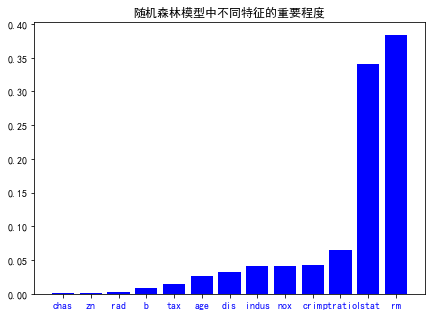

In [16]:
plt.figure(figsize=(7,5))
plt.title('随机森林模型中不同特征的重要程度')
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b')
plt.show()

In [17]:
#可视化测试集上回归预测的结果
result={"labels":y_test,"prediction":rf_reg.predict(x_test)}
result=pd.DataFrame(result)

In [18]:
result.head()

,labels,prediction
329,22.6,23.454859
371,50.0,23.684823
219,23.0,21.455594
403,8.3,11.879196
78,21.2,20.993748


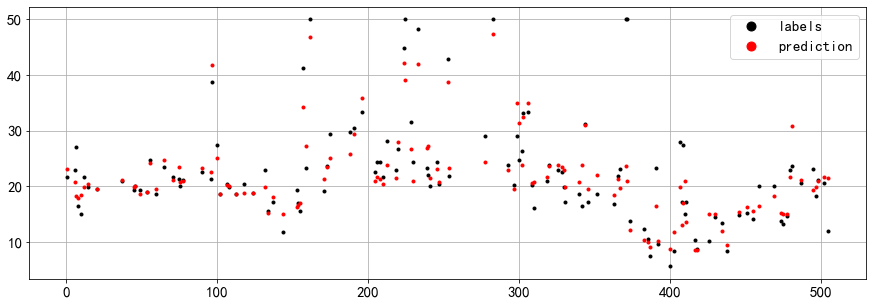

In [19]:
result['labels'].plot(style='k.',figsize=(15,5))
result['prediction'].plot(style='r.')
plt.legend(fontsize=15,markerscale=3)#设置图例字号以及图例大小
plt.tick_params(labelsize=15)#设置坐标数字大小
plt.grid()

In [21]:
#计算均方误差和均方根误差
from sklearn import metrics
MSE=metrics.mean_squared_error(y,rf_reg.predict(X))
RMSE=np.sqrt(MSE)
print('(MSE,RMSE)=',(MSE,RMSE))

(MSE,RMSE)= (7.604195051415625, 2.7575704979955864)


In [44]:
submission={"prediction":rf_reg.predict(x_test)}
submission=pd.DataFrame(submission)
submission.to_csv('随机森林预测波士顿房价数据提交.csv')